# COMP257 - Data Science Group Project - NEO (near-Earth Objects) Analysis

### (COMP_Pract_02(Fri 1pm)_Group H)
- Diana Dalae (45612226)
- John Allagiannis (45410399)
- Jason Yau Hou Ma (45429987)
- Ye Eun Kwon (45630380)

## Introduction
near-Earth Objects (NEO) are small Solar System bodies whose orbits bring them in close proximity with Earth. If a NEO's orbit crosses the Earth's orbit and the object is more than 140 across, it is classified as a Potentially Hazardous Object (PHO). Most NEO are asteroids, but some are comets.

## Project Goals
The goals of this project are:
1. Investigating if we can predict if NEO are PHOs from their physical and orbital characteristics.
2. Determining how often PHOs have close approaches with Earth.

## Datasets
We will be using two datasets in our analysis. Both of them were obtained from the Jet Propulsion Laboratory at the California Institute of Technology which is owned by NASA. The two datasets will be downloaded in CSV format.

Following are the links to where we obtained our data from:
* NEO database: https://ssd.jpl.nasa.gov/sbdb_query.cgi
* NEO Earth close approaches data: https://cneos.jpl.nasa.gov/ca/

The variable descriptions for the variables used in our final dataset can be found in the GitHub repository (variable_descriptions.md).

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 60)

import warnings
warnings.filterwarnings("ignore")

## Exploring the Datasets

### NEO dataset

In [2]:
neo = pd.read_csv('data/neo_data.csv', index_col=0)
print(neo.shape)
neo.head()

(20886, 50)


,full_name,pha,H,G,diameter,extent,albedo,rot_per,GM,BV,UB,spec_B,spec_T,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,data_arc,rms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0000433,433 Eros (1898 DQ),N,11.16,0.46,16.840,34.4x11.2x11.2,0.250,5.270,0.000446,0.921,0.531,S,S,0.060,656,2458600.5,58600.0,20190427.0,J2000,0.222736,1.458112,1.133339,10.828567,304.306262,178.821360,47.239460,1.782886,0.559780,2.458516e+06,2.019020e+07,643.109416,1.760738,0.149341,58.119037,3.28828,4.582,1.280800e-10,9.602700e-11,2.606700e-10,4.086800e-08,2.164300e-07,2.441600e-07,3.560200e-07,1.174200e-10,5.529900e-11,6.276700e-07,6.353000e-08,AMO,45762.0,0.27423
a0000719,719 Albert (1911 MT),N,15.40,NaN,NaN,NaN,NaN,5.801,NaN,NaN,NaN,S,NaN,NaN,200,2458600.5,58600.0,20190427.0,J2000,0.546301,2.638780,1.197212,11.564845,183.887286,156.163669,48.317252,4.080348,0.229932,2.458390e+06,2.018093e+07,1565.680891,4.286601,0.203359,79.141222,1.41490,3.141,2.280400e-08,2.539700e-09,6.079300e-08,3.033500e-06,1.734500e-05,1.773900e-05,2.482600e-06,3.927200e-09,3.319500e-10,1.057700e-05,2.260400e-06,AMO,39195.0,0.38217
a0000887,887 Alinda (1918 DB),N,13.40,-0.12,4.200,NaN,0.310,73.970,NaN,0.832,0.436,NaN,S,NaN,223,2458600.5,58600.0,20190427.0,J2000,0.569116,2.476488,1.067080,9.384536,110.428481,350.414323,193.414345,3.885896,0.252901,2.459259e+06,2.021021e+07,1423.484304,3.897288,0.086571,33.690758,1.31419,3.220,4.366900e-08,6.585400e-09,1.099500e-07,5.197500e-06,2.724100e-05,2.834000e-05,1.178400e-05,1.033300e-08,1.008800e-09,4.909300e-05,5.677900e-06,AMO,37095.0,0.50197
a0001036,1036 Ganymed (1924 TD),N,9.45,0.30,37.675,NaN,0.238,10.297,NaN,0.842,0.417,S,S,0.399,783,2458600.5,58600.0,20190427.0,J2000,0.533235,2.664145,1.243531,26.687613,215.557505,132.396356,274.156198,4.084760,0.226656,2.458979e+06,2.020051e+07,1588.310093,4.348556,0.343497,133.678727,1.94996,3.035,2.428100e-08,2.378600e-09,6.475800e-08,4.054900e-06,7.189700e-06,7.604100e-06,2.310500e-06,3.646900e-09,3.035400e-10,1.054800e-05,2.127100e-06,AMO,34631.0,0.38253
a0001221,1221 Amor (1932 EA1),N,17.70,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,2458600.5,58600.0,20190427.0,J2000,0.435321,1.919416,1.083854,11.876530,171.337230,26.674820,250.280309,2.754978,0.370638,2.458897e+06,2.020022e+07,971.296846,2.659266,0.107716,41.919836,2.21482,3.781,4.595100e-08,1.231400e-09,8.873800e-08,6.091000e-06,2.795500e-05,2.981500e-05,9.605600e-06,1.767500e-09,3.566800e-10,2.603200e-05,9.347300e-07,AMO,31628.0,0.45599


In [3]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20886 entries, a0000433 to dK19M020
Data columns (total 50 columns):
full_name         20886 non-null object
pha               20708 non-null object
H                 20707 non-null float64
G                 13 non-null float64
diameter          869 non-null float64
extent            10 non-null object
albedo            808 non-null float64
rot_per           1371 non-null float64
GM                4 non-null float64
BV                38 non-null float64
UB                38 non-null float64
spec_B            313 non-null object
spec_T            36 non-null object
diameter_sigma    763 non-null float64
orbit_id          20886 non-null object
epoch             20886 non-null float64
epoch_mjd         20886 non-null float64
epoch_cal         20886 non-null float64
equinox           20886 non-null object
e                 20886 non-null float64
a                 20886 non-null float64
q                 20886 non-null float64
i                 2

In [4]:
neo.describe()

,H,G,diameter,albedo,rot_per,GM,BV,UB,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,data_arc,rms
count,20707.000000,13.000000,869.000000,808.000000,1371.000000,4.000000e+00,38.000000,38.000000,763.000000,2.088600e+04,20886.000000,2.088600e+04,20886.000000,20886.000000,20886.000000,20886.000000,20886.000000,20886.000000,20886.000000,20886.000000,20886.000000,2.088600e+04,2.088600e+04,2.088600e+04,20886.000000,2.087400e+04,20874.000000,20759.000000,20886.000000,2.087200e+04,2.087200e+04,2.087200e+04,2.087200e+04,2.087200e+04,2.087200e+04,2.087200e+04,2.087200e+04,2.087200e+04,2.087200e+04,2.087200e+04,20689.000000,20873.000000
mean,22.691793,0.111538,1.276669,0.179225,16.034092,1.115849e-04,0.814263,0.416500,0.135043,2.457935e+06,57934.572395,2.017177e+07,0.448214,1.825766,0.915296,12.772243,173.109333,181.693393,173.347571,2.736236,0.513164,2.457927e+06,2.017026e+07,1.085672e+03,2.972407,9.602786e-02,37.371162,2.670279,4.219527,1.790822e-01,2.300890e-01,3.656327e-01,7.396364e-01,1.888965e+00,3.274847e+00,2.111261e+01,3.850919e-01,4.904797e-02,7.565692e+01,4.520089e+02,1485.084441,0.609522
std,2.986943,0.241966,2.199642,0.139695,65.987506,2.231434e-04,0.091066,0.102057,0.264882,1.961278e+03,1961.278217,5.410706e+04,0.178148,2.814443,0.235457,11.629078,103.517172,103.999191,121.993077,5.614875,0.281570,1.978050e+03,5.425075e+04,1.885427e+04,51.620189,1.033519e-01,40.221449,0.970946,1.080195,2.469320e+01,1.932805e+01,5.217160e+01,8.144117e+01,2.356051e+02,3.764546e+02,2.880922e+03,3.149680e+01,5.935742e+00,1.065549e+04,4.073964e+04,3365.144281,17.189212
min,9.450000,-0.250000,0.002500,0.009000,0.004389,2.100000e-09,0.640000,0.160000,0.000500,2.366200e+06,-33800.000000,1.766050e+07,0.004042,0.555276,0.028321,0.013555,0.041910,0.011138,-15.567486,0.773684,0.000133,2.366195e+06,1.766043e+07,1.511339e+02,0.413782,3.437640e-07,0.000134,0.001720,-0.944000,1.280800e-10,4.026100e-11,2.606700e-10,4.086800e-08,1.534700e-07,2.441600e-07,1.207000e-07,4.846400e-11,2.414700e-11,6.276700e-07,1.875800e-08,1.000000,0.020872
25%,20.400000,-0.080000,0.357000,0.056000,2.394500,4.425000e-09,0.763750,0.368500,0.013000,2.458340e+06,58340.000000,2.018081e+07,0.318394,1.319888,0.783850,4.677544,82.558103,92.454976,51.988602,1.727583,0.299631,2.458052e+06,2.017103e+07,5.538652e+02,1.516400,1.658802e-02,6.455562,1.931625,3.401000,4.390650e-07,1.204300e-07,5.164600e-07,3.482025e-05,5.264600e-05,1.101250e-04,1.499250e-04,1.746550e-07,4.498125e-08,2.336375e-04,8.842275e-05,8.000000,0.397930
50%,22.800000,0.100000,0.739000,0.151500,4.890000,1.872000e-08,0.830000,0.454500,0.038000,2.458600e+06,58600.000000,2.019043e+07,0.460863,1.731816,0.964557,9.037307,172.162093,183.937303,166.785992,2.515398,0.432466,2.458481e+06,2.018123e+07,8.324362e+02,2.279086,5.555130e-02,21.618899,2.799390,3.979000,1.209700e-04,2.501550e-04,1.939700e-05,1.482450e-03,4.621800e-04,1.470850e-03,4.288250e-02,3.402600e-04,1.229350e-04,1.935650e-02,1.703600e-01,32.000000,0.475260
75%,25.000000,0.250000,1.500000,0.268000,10.550500,1.115992e-04,0.869500,0.490000,0.149500,2.458600e+06,58600.000000,2.019043e+07,0.572856,2.211795,1.073454,18.012145,255.060237,270.670666,293.505307,3.426152,0.649978,2.458699e+06,2.019080e+07,1.201478e+03,3.289467,1.476780e-01,57.471847,3.508655,4.845000,8.712200e-04,2.687950e-03,1.731600e-04,1.366825e-02,3.625025e-03,1.211050e-02,2.496350e-01,3.901125e-03,1.013075e-03,2.615600e-01,1.927925e+00,1486.000000,0.559690
max,33.200000,0.600000,37.675000,0.856000,1880.000000,4.463000e-04,1.022000,0.531000,3.496000,2.458732e+06,58731.000000,2.019090e+07,0.996731,380.392082,1.299962,172.513745,359.999286,359.980769,359.998040,759.540629,2.381994,2.459912e+06,2.022113e+07,2.709852e+06,7419.171401,7.081460e-01,275.589179,4.622960,9.884000,3.567400e+03,2.394400e+03,7.537300e+03,1.175100e+04,3.402700e+04,5.436200e+04,4.162

### NEO Earth Close Approaches dataset

In [5]:
approach = pd.read_csv('data/neo_closeapproach.csv', index_col=0)
print(approach.shape)
approach.head()

(8668, 8)


,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Estimated Diameter,Unnamed: 8
Object,,,,,,,,
(2019 QE1),2019-Sep-05 21:39 ± 00:04,13.11 | 0.03368,12.88 | 0.03311,6.63,6.61,25.1,25 m - 56 m,bK19Q01E
(2019 GT3),2019-Sep-06 04:21 ± < 00:01,19.44 | 0.04996,19.44 | 0.04996,13.64,13.64,21.0,170 m - 380 m,bK19G03T
(2019 RA),2019-Sep-07 06:56 ± < 00:01,4.52 | 0.01162,4.51 | 0.01160,5.72,5.68,25.4,22 m - 50 m,bK19R00A
(2019 QZ),2019-Sep-08 08:12 ± < 00:01,15.66 | 0.04025,15.62 | 0.04013,4.34,4.33,26.1,16 m - 36 m,bK19Q00Z
(2019 QZ3),2019-Sep-09 10:16 ± < 00:01,9.69 | 0.02491,9.68 | 0.02487,7.47,7.46,24.7,30 m - 68 m,bK19Q03Z


In [6]:
approach.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8668 entries, (2019 QE1) to (2018 LM2)
Data columns (total 8 columns):
Close-Approach (CA) Date         8668 non-null object
CA Distance Nominal (LD | au)    8668 non-null object
CA Distance Minimum (LD | au)    8668 non-null object
V relative (km/s)                8668 non-null float64
V infinity (km/s)                8667 non-null float64
H (mag)                          8665 non-null float64
Estimated Diameter               8665 non-null object
Unnamed: 8                       8668 non-null object
dtypes: float64(3), object(5)
memory usage: 609.5+ KB


In [7]:
approach.describe()

,V relative (km/s),V infinity (km/s),H (mag)
count,8668.000000,8667.000000,8665.000000
mean,10.896789,10.880376,23.466728
std,5.827644,5.834516,2.946040
min,0.140000,0.170000,14.100000
25%,6.667500,6.650000,21.200000
50%,9.650000,9.640000,23.800000
75%,13.990000,13.980000,25.800000
max,41.970000,41.970000,32.300000


## Data Cleansing
There are certain variables in both the datasets that are irrelevant to our data analysis. They do not provide sufficient and beneficial information and so they should be dropped. We furthermore need to decide what we are going to do with NaN values.

### Cleaning the NEO dataset

In [8]:
neoClean = neo.drop(['om', 'w', 'ma', 'ad', 'sigma_om', 'sigma_w',
                     'sigma_ma', 'sigma_ad', 'data_arc', 'rms'], axis=1)
print(neoClean.shape)
neoClean.head()

(20886, 40)


,full_name,pha,H,G,diameter,extent,albedo,rot_per,GM,BV,UB,spec_B,spec_T,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0000433,433 Eros (1898 DQ),N,11.16,0.46,16.840,34.4x11.2x11.2,0.250,5.270,0.000446,0.921,0.531,S,S,0.060,656,2458600.5,58600.0,20190427.0,J2000,0.222736,1.458112,1.133339,10.828567,0.559780,2.458516e+06,2.019020e+07,643.109416,1.760738,0.149341,58.119037,3.28828,4.582,1.280800e-10,9.602700e-11,2.606700e-10,4.086800e-08,5.529900e-11,6.276700e-07,6.353000e-08,AMO
a0000719,719 Albert (1911 MT),N,15.40,NaN,NaN,NaN,NaN,5.801,NaN,NaN,NaN,S,NaN,NaN,200,2458600.5,58600.0,20190427.0,J2000,0.546301,2.638780,1.197212,11.564845,0.229932,2.458390e+06,2.018093e+07,1565.680891,4.286601,0.203359,79.141222,1.41490,3.141,2.280400e-08,2.539700e-09,6.079300e-08,3.033500e-06,3.319500e-10,1.057700e-05,2.260400e-06,AMO
a0000887,887 Alinda (1918 DB),N,13.40,-0.12,4.200,NaN,0.310,73.970,NaN,0.832,0.436,NaN,S,NaN,223,2458600.5,58600.0,20190427.0,J2000,0.569116,2.476488,1.067080,9.384536,0.252901,2.459259e+06,2.021021e+07,1423.484304,3.897288,0.086571,33.690758,1.31419,3.220,4.366900e-08,6.585400e-09,1.099500e-07,5.197500e-06,1.008800e-09,4.909300e-05,5.677900e-06,AMO
a0001036,1036 Ganymed (1924 TD),N,9.45,0.30,37.675,NaN,0.238,10.297,NaN,0.842,0.417,S,S,0.399,783,2458600.5,58600.0,20190427.0,J2000,0.533235,2.664145,1.243531,26.687613,0.226656,2.458979e+06,2.020051e+07,1588.310093,4.348556,0.343497,133.678727,1.94996,3.035,2.428100e-08,2.378600e-09,6.475800e-08,4.054900e-06,3.035400e-10,1.054800e-05,2.127100e-06,AMO
a0001221,1221 Amor (1932 EA1),N,17.70,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,2458600.5,58600.0,20190427.0,J2000,0.435321,1.919416,1.083854,11.876530,0.370638,2.458897e+06,2.020022e+07,971.296846,2.659266,0.107716,41.919836,2.21482,3.781,4.595100e-08,1.231400e-09,8.873800e-08,6.091000e-06,3.566800e-10,2.603200e-05,9.347300e-07,AMO


In [9]:
neoClean.isnull().sum().sum()

226089

In [10]:
neoClean.isnull().sum()

full_name             0
pha                 178
H                   179
G                 20873
diameter          20017
extent            20876
albedo            20078
rot_per           19515
GM                20882
BV                20848
UB                20848
spec_B            20573
spec_T            20850
diameter_sigma    20123
orbit_id              0
epoch                 0
epoch_mjd             0
epoch_cal             0
equinox               0
e                     0
a                     0
q                     0
i                     0
n                     0
tp                    0
tp_cal                0
per                   0
per_y                 0
moid                 12
moid_ld              12
moid_jup            127
t_jup                 0
sigma_e              14
sigma_a              14
sigma_q              14
sigma_i              14
sigma_n              14
sigma_tp             14
sigma_per            14
class                 0
dtype: int64

In [11]:
# Dropping all the columns where >90% of the values are NaN
neoClean1 = neoClean.drop(['G', 'diameter', 'extent', 'albedo', 'rot_per', 
                           'GM', 'BV', 'UB', 'spec_B', 'spec_T', 'diameter_sigma'], axis=1)
print(neoClean1.shape)
neoClean1.head()

(20886, 29)


,full_name,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0000433,433 Eros (1898 DQ),N,11.16,656,2458600.5,58600.0,20190427.0,J2000,0.222736,1.458112,1.133339,10.828567,0.559780,2.458516e+06,2.019020e+07,643.109416,1.760738,0.149341,58.119037,3.28828,4.582,1.280800e-10,9.602700e-11,2.606700e-10,4.086800e-08,5.529900e-11,6.276700e-07,6.353000e-08,AMO
a0000719,719 Albert (1911 MT),N,15.40,200,2458600.5,58600.0,20190427.0,J2000,0.546301,2.638780,1.197212,11.564845,0.229932,2.458390e+06,2.018093e+07,1565.680891,4.286601,0.203359,79.141222,1.41490,3.141,2.280400e-08,2.539700e-09,6.079300e-08,3.033500e-06,3.319500e-10,1.057700e-05,2.260400e-06,AMO
a0000887,887 Alinda (1918 DB),N,13.40,223,2458600.5,58600.0,20190427.0,J2000,0.569116,2.476488,1.067080,9.384536,0.252901,2.459259e+06,2.021021e+07,1423.484304,3.897288,0.086571,33.690758,1.31419,3.220,4.366900e-08,6.585400e-09,1.099500e-07,5.197500e-06,1.008800e-09,4.909300e-05,5.677900e-06,AMO
a0001036,1036 Ganymed (1924 TD),N,9.45,783,2458600.5,58600.0,20190427.0,J2000,0.533235,2.664145,1.243531,26.687613,0.226656,2.458979e+06,2.020051e+07,1588.310093,4.348556,0.343497,133.678727,1.94996,3.035,2.428100e-08,2.378600e-09,6.475800e-08,4.054900e-06,3.035400e-10,1.054800e-05,2.127100e-06,AMO
a0001221,1221 Amor (1932 EA1),N,17.70,80,2458600.5,58600.0,20190427.0,J2000,0.435321,1.919416,1.083854,11.876530,0.370638,2.458897e+06,2.020022e+07,971.296846,2.659266,0.107716,41.919836,2.21482,3.781,4.595100e-08,1.231400e-09,8.873800e-08,6.091000e-06,3.566800e-10,2.603200e-05,9.347300e-07,AMO


In [12]:
neoClean1.isnull().sum().sum()

606

In [13]:
neoClean1.isnull().sum()

full_name      0
pha          178
H            179
orbit_id       0
epoch          0
epoch_mjd      0
epoch_cal      0
equinox        0
e              0
a              0
q              0
i              0
n              0
tp             0
tp_cal         0
per            0
per_y          0
moid          12
moid_ld       12
moid_jup     127
t_jup          0
sigma_e       14
sigma_a       14
sigma_q       14
sigma_i       14
sigma_n       14
sigma_tp      14
sigma_per     14
class          0
dtype: int64

In [14]:
# The amount of NaN values dropped significantly from 226089 to 606
# All of these 606 NaN values will be dropped from the dataset
neoClean1.dropna().isnull().sum()

full_name    0
pha          0
H            0
orbit_id     0
epoch        0
epoch_mjd    0
epoch_cal    0
equinox      0
e            0
a            0
q            0
i            0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
moid_jup     0
t_jup        0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
dtype: int64

In [15]:
neoClean2 = neoClean1.dropna()
neoClean2.set_index('full_name', inplace=True)
print(neoClean2.shape)
neoClean2.head()

(20706, 28)


,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,class
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
433 Eros (1898 DQ),N,11.16,656,2458600.5,58600.0,20190427.0,J2000,0.222736,1.458112,1.133339,10.828567,0.559780,2.458516e+06,2.019020e+07,643.109416,1.760738,0.149341,58.119037,3.28828,4.582,1.280800e-10,9.602700e-11,2.606700e-10,4.086800e-08,5.529900e-11,6.276700e-07,6.353000e-08,AMO
719 Albert (1911 MT),N,15.40,200,2458600.5,58600.0,20190427.0,J2000,0.546301,2.638780,1.197212,11.564845,0.229932,2.458390e+06,2.018093e+07,1565.680891,4.286601,0.203359,79.141222,1.41490,3.141,2.280400e-08,2.539700e-09,6.079300e-08,3.033500e-06,3.319500e-10,1.057700e-05,2.260400e-06,AMO
887 Alinda (1918 DB),N,13.40,223,2458600.5,58600.0,20190427.0,J2000,0.569116,2.476488,1.067080,9.384536,0.252901,2.459259e+06,2.021021e+07,1423.484304,3.897288,0.086571,33.690758,1.31419,3.220,4.366900e-08,6.585400e-09,1.099500e-07,5.197500e-06,1.008800e-09,4.909300e-05,5.677900e-06,AMO
1036 Ganymed (1924 TD),N,9.45,783,2458600.5,58600.0,20190427.0,J2000,0.533235,2.664145,1.243531,26.687613,0.226656,2.458979e+06,2.020051e+07,1588.310093,4.348556,0.343497,133.678727,1.94996,3.035,2.428100e-08,2.378600e-09,6.475800e-08,4.054900e-06,3.035400e-10,1.054800e-05,2.127100e-06,AMO
1221 Amor (1932 EA1),N,17.70,80,2458600.5,58600.0,20190427.0,J2000,0.435321,1.919416,1.083854,11.876530,0.370638,2.458897e+06,2.020022e+07,971.296846,2.659266,0.107716,41.919836,2.21482,3.781,4.595100e-08,1.231400e-09,8.873800e-08,6.091000e-06,3.566800e-10,2.603200e-05,9.347300e-07,AMO


In [16]:
neoClean2.index

Index(['   433 Eros (1898 DQ)', '   719 Albert (1911 MT)',
       '   887 Alinda (1918 DB)', '  1036 Ganymed (1924 TD)',
       '  1221 Amor (1932 EA1)', '  1566 Icarus (1949 MA)',
       '  1580 Betulia (1950 KA)', '  1620 Geographos (1951 RA)',
       '  1627 Ivar (1929 SH)', '  1685 Toro (1948 OA)',
       ...
       '       (2019 RG)', '       (2019 RH)', '       (2019 RJ)',
       '       (2019 RK)', '       (2019 RL)', '       (2019 RP)',
       '       (2019 RQ)', '       (2019 RT)', '       (2019 RU)',
       '       (6344 P-L)'],
      dtype='object', name='full_name', length=20706)

### Cleaning the NEO Earth Close Approaches dataset

In [17]:
approachClean = approach.drop(['Unnamed: 8'], axis=1)
print(approachClean.shape)
approachClean.head()

(8668, 7)


,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Estimated Diameter
Object,,,,,,,
(2019 QE1),2019-Sep-05 21:39 ± 00:04,13.11 | 0.03368,12.88 | 0.03311,6.63,6.61,25.1,25 m - 56 m
(2019 GT3),2019-Sep-06 04:21 ± < 00:01,19.44 | 0.04996,19.44 | 0.04996,13.64,13.64,21.0,170 m - 380 m
(2019 RA),2019-Sep-07 06:56 ± < 00:01,4.52 | 0.01162,4.51 | 0.01160,5.72,5.68,25.4,22 m - 50 m
(2019 QZ),2019-Sep-08 08:12 ± < 00:01,15.66 | 0.04025,15.62 | 0.04013,4.34,4.33,26.1,16 m - 36 m
(2019 QZ3),2019-Sep-09 10:16 ± < 00:01,9.69 | 0.02491,9.68 | 0.02487,7.47,7.46,24.7,30 m - 68 m


In [18]:
approachClean.isnull().sum().sum()

7

In [19]:
approachClean.isnull().sum()

Close-Approach (CA) Date         0
CA Distance Nominal (LD | au)    0
CA Distance Minimum (LD | au)    0
V relative (km/s)                0
V infinity (km/s)                1
H (mag)                          3
Estimated Diameter               3
dtype: int64

In [20]:
# There are only 7 NaN values altogether in the dataset which will all be dropped
approachClean.dropna().isnull().sum()

Close-Approach (CA) Date         0
CA Distance Nominal (LD | au)    0
CA Distance Minimum (LD | au)    0
V relative (km/s)                0
V infinity (km/s)                0
H (mag)                          0
Estimated Diameter               0
dtype: int64

In [21]:
approachClean1 = approachClean.dropna()
print(approachClean1.shape)
approachClean1.head()

(8664, 7)


,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Estimated Diameter
Object,,,,,,,
(2019 QE1),2019-Sep-05 21:39 ± 00:04,13.11 | 0.03368,12.88 | 0.03311,6.63,6.61,25.1,25 m - 56 m
(2019 GT3),2019-Sep-06 04:21 ± < 00:01,19.44 | 0.04996,19.44 | 0.04996,13.64,13.64,21.0,170 m - 380 m
(2019 RA),2019-Sep-07 06:56 ± < 00:01,4.52 | 0.01162,4.51 | 0.01160,5.72,5.68,25.4,22 m - 50 m
(2019 QZ),2019-Sep-08 08:12 ± < 00:01,15.66 | 0.04025,15.62 | 0.04013,4.34,4.33,26.1,16 m - 36 m
(2019 QZ3),2019-Sep-09 10:16 ± < 00:01,9.69 | 0.02491,9.68 | 0.02487,7.47,7.46,24.7,30 m - 68 m


#### Observation
The only physical characteristic left after data cleansing is the absolute magnitude H. This might indicate that physical characteristics of NEO are much harder to obtain than their orbital characteristics, hence many objects having NaN values when those characteristics are unavailable.

## Joining Datasets 
Since the neo_Clean2 dataset is a list of objects and the approachClean1 dataset is a list of approaches, we need to find a way to use data from the approaches dataset in order to add more information to the main neo_Clean2 dataset.

In [22]:
appcount = approachClean1.groupby('Object').nunique()
print(appcount.shape)
appcount.head()

(3603, 7)


,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Estimated Diameter
Object,,,,,,,
(1983 LC),2,2,2,2,2,1,1
(1991 GO),3,3,3,3,3,1,1
(1991 TT),1,1,1,1,1,1,1
(1991 VG),1,1,1,1,1,1,1
(1993 DA),5,5,5,5,5,1,1


Counting the number of times each object approaches Earth.

In [23]:
appcount.index

Index(['(1983 LC)', '(1991 GO)', '(1991 TT)', '(1991 VG)', '(1993 DA)',
       '(1993 KA)', '(1993 KA2)', '(1993 TZ)', '(1994 GL)', '(1994 WR12)',
       ...
       '85990 (1999 JV6)', '86039 (1999 NC43)', '86819 (2000 GK137)',
       '87684 (2000 SY2)', '88959 (2001 TZ44)', '89136 (2001 US16)',
       '90403 (2003 YE45)', '90416 (2003 YK118)', '9856 (1991 EE)',
       '99942 Apophis (2004 MN4)'],
      dtype='object', name='Object', length=3603)

In [24]:
appcount['Times Approached'] = appcount['Close-Approach (CA) Date'] 
appcount_1 = appcount['Times Approached']
appcount_1.head()

Object
(1983 LC)    2
(1991 GO)    3
(1991 TT)    1
(1991 VG)    1
(1993 DA)    5
Name: Times Approached, dtype: int64

Making a new dataframe containing only object indices and the number of times each object approaches Earth.

In [25]:
approach_joined = approachClean1.join(appcount_1, how='inner')
approach_joined.head()

,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Estimated Diameter,Times Approached
Object,,,,,,,,
(1983 LC),2097-Jun-26 12:49 ± 00:05,13.34 | 0.03429,13.34 | 0.03427,18.85,18.85,19.3,370 m - 820 m,2
(1983 LC),2177-Jul-06 19:05 ± 06:48,16.40 | 0.04213,15.72 | 0.04039,16.85,16.85,19.3,370 m - 820 m,2
(1991 GO),2073-Oct-24 20:29 ± < 00:01,15.48 | 0.03978,15.48 | 0.03978,19.34,19.33,20.0,270 m - 590 m,3
(1991 GO),2081-Oct-25 19:04 ± 00:01,14.84 | 0.03814,14.84 | 0.03814,19.03,19.03,20.0,270 m - 590 m,3
(1991 GO),2089-Oct-27 13:27 ± 00:02,13.94 | 0.03581,13.93 | 0.03580,18.22,18.21,20.0,270 m - 590 m,3


Adding new information to the approaches dataset.

In [26]:
v_average = []
i = 0
while i <= len(approach_joined) -1:
    if approach_joined.iloc[i,7] > 1:
        v_average.append(approach_joined['V relative (km/s)'].iloc[i:i+approach_joined.iloc[i,7]].mean())
        
    if approach_joined.iloc[i,7] == 1:
        v_average.append(approach_joined.iloc[i,3])

    i += approach_joined.iloc[i,7]

Calculating the average velocity of each approaching object.

In [27]:
appcount['v average'] = v_average
appcount2 = appcount.iloc[:,7:9]
appcount2.head()

,Times Approached,v average
Object,,
(1983 LC),2,17.850000
(1991 GO),3,18.863333
(1991 TT),1,8.030000
(1991 VG),1,2.250000
(1993 DA),5,6.686000


Dropping unnecessary columns that were only needed for counting. 

In [28]:
neoClean2['class'] = neoClean2['class'].astype('category')
neoClean2["class_cat"] = neoClean2["class"].cat.codes
neoClean2['pha'] = neoClean2['pha'].astype('category')
neoClean2["pha_cat"] = neoClean2["pha"].cat.codes

Converting categorical values to numerical values for further analysis.

Classes:
1. AMO - 0
2. ATO - 1
3. ATE - 2
4. IEO - 3

PHA:
1. N = 0
2. Y = 1

### Final dataset

In [29]:
# joining datasets together
neo_joined = neoClean2.join(appcount2, how='inner')
print(neo_joined.shape)
neo_joined.head()

(465, 32)


,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,class,class_cat,pha_cat,Times Approached,v average
101869 (1999 MM),Y,19.20,58,2458600.5,58600.0,20190427.0,J2000,0.610915,1.624058,0.631896,4.764781,0.476214,2.458978e+06,2.020051e+07,755.963290,2.069715,0.001556,0.605529,2.85066,4.085,6.493900e-08,4.735400e-09,1.039300e-07,0.000015,2.082800e-09,0.000042,3.306400e-06,APO,1,1,2,18.265000
101955 Bennu (1999 RQ36),Y,20.19,97,2455562.5,55562.0,20110101.0,J2000,0.203745,1.126391,0.896894,6.034940,0.824461,2.455439e+06,2.010083e+07,436.648728,1.195479,0.003223,1.254217,3.87795,5.525,2.208200e-08,4.026100e-11,2.486000e-08,0.000003,4.420300e-11,0.000003,2.341100e-08,APO,1,1,4,5.960000
111253 (2001 XU10),Y,15.20,212,2458600.5,58600.0,20190427.0,J2000,0.439538,1.753508,0.982775,42.026643,0.424466,2.458757e+06,2.019093e+07,848.125401,2.322041,0.030188,11.748147,2.79705,3.742,8.219000e-08,9.320700e-09,1.439500e-07,0.000010,3.384300e-09,0.000055,6.762200e-06,APO,1,1,1,24.260000
136617 (1994 CC),Y,17.70,159,2458600.5,58600.0,20190427.0,J2000,0.417020,1.637669,0.954728,4.681355,0.470289,2.458849e+06,2.019123e+07,765.486543,2.095788,0.016203,6.305605,2.89424,4.194,1.477300e-08,7.419100e-09,2.155700e-08,0.000003,3.195800e-09,0.000028,5.201800e-06,APO,1,1,3,8.003333
136618 (1994 CN2),Y,16.70,147,2458600.5,58600.0,20190427.0,J2000,0.394787,1.573058,0.952035,1.439177,0.499559,2.458478e+06,2.018123e+07,720.635556,1.972993,0.012544,4.881865,3.22998,4.318,6.613900e-07,2.495800e-08,1.054500e-06,0.000004,1.188900e-08,0.000614,1.715000e-05,APO,1,1,5,7.774000


In [30]:
neo_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465 entries, 101869 (1999 MM) to 539063 (2016 MK1)
Data columns (total 32 columns):
pha                 465 non-null category
H                   465 non-null float64
orbit_id            465 non-null object
epoch               465 non-null float64
epoch_mjd           465 non-null float64
epoch_cal           465 non-null float64
equinox             465 non-null object
e                   465 non-null float64
a                   465 non-null float64
q                   465 non-null float64
i                   465 non-null float64
n                   465 non-null float64
tp                  465 non-null float64
tp_cal              465 non-null float64
per                 465 non-null float64
per_y               465 non-null float64
moid                465 non-null float64
moid_ld             465 non-null float64
moid_jup            465 non-null float64
t_jup               465 non-null float64
sigma_e             465 non-null float64
sigma_a    

In [31]:
neo_joined.describe()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,class_cat,pha_cat,Times Approached,v average
count,465.000000,4.650000e+02,465.000000,4.650000e+02,465.000000,465.000000,465.000000,465.000000,465.000000,4.650000e+02,4.650000e+02,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,465.000000,465.000000,465.000000,465.000000
mean,19.632237,2.458520e+06,58519.946237,2.018820e+07,0.461299,1.435736,0.729271,13.072205,0.697350,2.458527e+06,2.018673e+07,653.537590,1.789288,0.020861,8.118643,3.115798,4.869503,1.291380e-07,1.562047e-08,1.633388e-07,1.340084e-05,1.132754e-08,6.596583e-05,1.089317e-05,1.152688,0.935484,2.961290,14.960616
std,1.517644,4.036129e+02,403.612902,1.121608e+04,0.179467,0.475741,0.223476,12.246617,0.344660,4.579686e+02,1.286218e+04,330.362084,0.904482,0.015126,5.886567,0.851812,1.237227,2.945635e-07,3.043409e-08,3.998667e-07,1.312233e-05,2.781702e-08,1.590304e-04,2.411339e-05,0.455236,0.245935,2.091291,6.964483
min,14.700000,2.455562e+06,55562.000000,2.011010e+07,0.065199,0.635232,0.092870,0.146165,0.171407,2.455439e+06,2.010083e+07,184.925621,0.506299,0.000053,0.020753,0.154019,2.367000,1.649100e-09,4.026100e-11,2.618600e-09,9.310800e-07,2.414700e-11,9.586100e-07,2.341100e-08,0.000000,0.000000,1.000000,2.885000
25%,18.600000,2.458600e+06,58600.000000,2.019043e+07,0.320653,1.076194,0.573990,4.547983,0.431798,2.458449e+06,2.018113e+07,407.788021,1.116463,0.008329,3.241529,2.580100,3.921000,3.099000e-08,3.012700e-09,4.278300e-08,4.943200e-06,2.333100e-09,1.557000e-05,1.847400e-06,1.000000,1.000000,1.000000,9.653333
50%,19.700000,2.458600e+06,58600.000000,2.019043e+07,0.467090,1.355438,0.783700,8.988641,0.624575,2.458600e+06,2.019043e+07,576.391669,1.578074,0.018320,7.129517,3.300670,4.680000,6.132100e-08,6.383100e-09,7.931300e-08,8.957700e-06,4.265100e-09,3.077700e-05,4.355000e-06,1.000000,1.000000,3.000000,13.690000
75%,20.600000,2.458600e+06,58600.000000,2.019043e+07,0.582986,1.733601,0.913659,18.471955,0.882812,2.458739e+06,2.019091e+07,833.723523,2.282611,0.031080,12.095481,3.796710,5.675000,1.140300e-07,1.598800e-08,1.570300e-07,1.705900e-05,9.415400e-09,6.433000e-05,1.078300e-05,1.000000,1.000000,4.000000,18.455000
max,25.500000,2.458600e+06,58600.000000,2.019043e+07,0.959992,3.209596,1.049848,75.377946,1.946729,2.459295e+06,2.021032e+07,2100.264800,5.750212,0.106664,41.510429,4.465010,8.751000,4.419100e-06,3.656700e-07,6.984000e-06,1.260700e-04,3.085200e-07,2.502600e-03,3.587400e-04,3.000000,1.000000,18.000000,41.970000


## Data Exploration

In [32]:
# checking how many NEO were not a PHO
neo_check = neo_joined[neo_joined['pha'] == 'N']
neo_check.shape

(30, 32)

(0, 27.556831557033647)

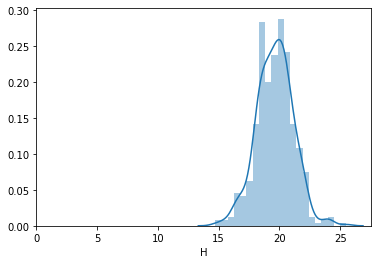

In [33]:
# H (asteroid’s absolute magnitude)
sns.distplot(neo_joined['H'])
plt.xlim(0, None)

The distribution of H is normally distributed.

(0, 20.98960592559758)

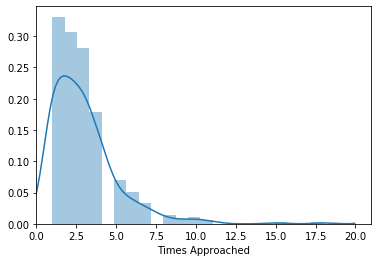

In [34]:
# Times Approached
sns.distplot(neo_joined['Times Approached'])
plt.xlim(0, None)

The distribution of Times Approached is right-skewed and has a long tail.

In [35]:
neo_joined['Times Approached'].max()

18

(0, 50.59957287724557)

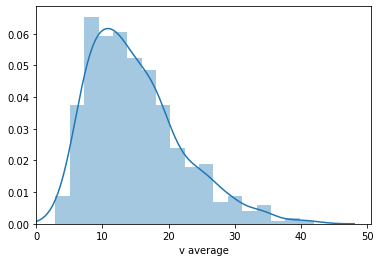

In [36]:
# v average
sns.distplot(neo_joined['v average'])
plt.xlim(0, None)

The distribution of v average is approximately normally distributed.

In [37]:
# simplifying the final dataset
neo_analysis_1 = neo_joined.iloc[:,[1,7,8,9,10,11,12,13,14,15,16,17,18,19,27,28,29,30,31]]
print(neo_analysis_1.shape)
neo_analysis_1.head()

(465, 19)


,H,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,class,class_cat,pha_cat,Times Approached,v average
101869 (1999 MM),19.20,0.610915,1.624058,0.631896,4.764781,0.476214,2.458978e+06,2.020051e+07,755.963290,2.069715,0.001556,0.605529,2.85066,4.085,APO,1,1,2,18.265000
101955 Bennu (1999 RQ36),20.19,0.203745,1.126391,0.896894,6.034940,0.824461,2.455439e+06,2.010083e+07,436.648728,1.195479,0.003223,1.254217,3.87795,5.525,APO,1,1,4,5.960000
111253 (2001 XU10),15.20,0.439538,1.753508,0.982775,42.026643,0.424466,2.458757e+06,2.019093e+07,848.125401,2.322041,0.030188,11.748147,2.79705,3.742,APO,1,1,1,24.260000
136617 (1994 CC),17.70,0.417020,1.637669,0.954728,4.681355,0.470289,2.458849e+06,2.019123e+07,765.486543,2.095788,0.016203,6.305605,2.89424,4.194,APO,1,1,3,8.003333
136618 (1994 CN2),16.70,0.394787,1.573058,0.952035,1.439177,0.499559,2.458478e+06,2.018123e+07,720.635556,1.972993,0.012544,4.881865,3.22998,4.318,APO,1,1,5,7.774000


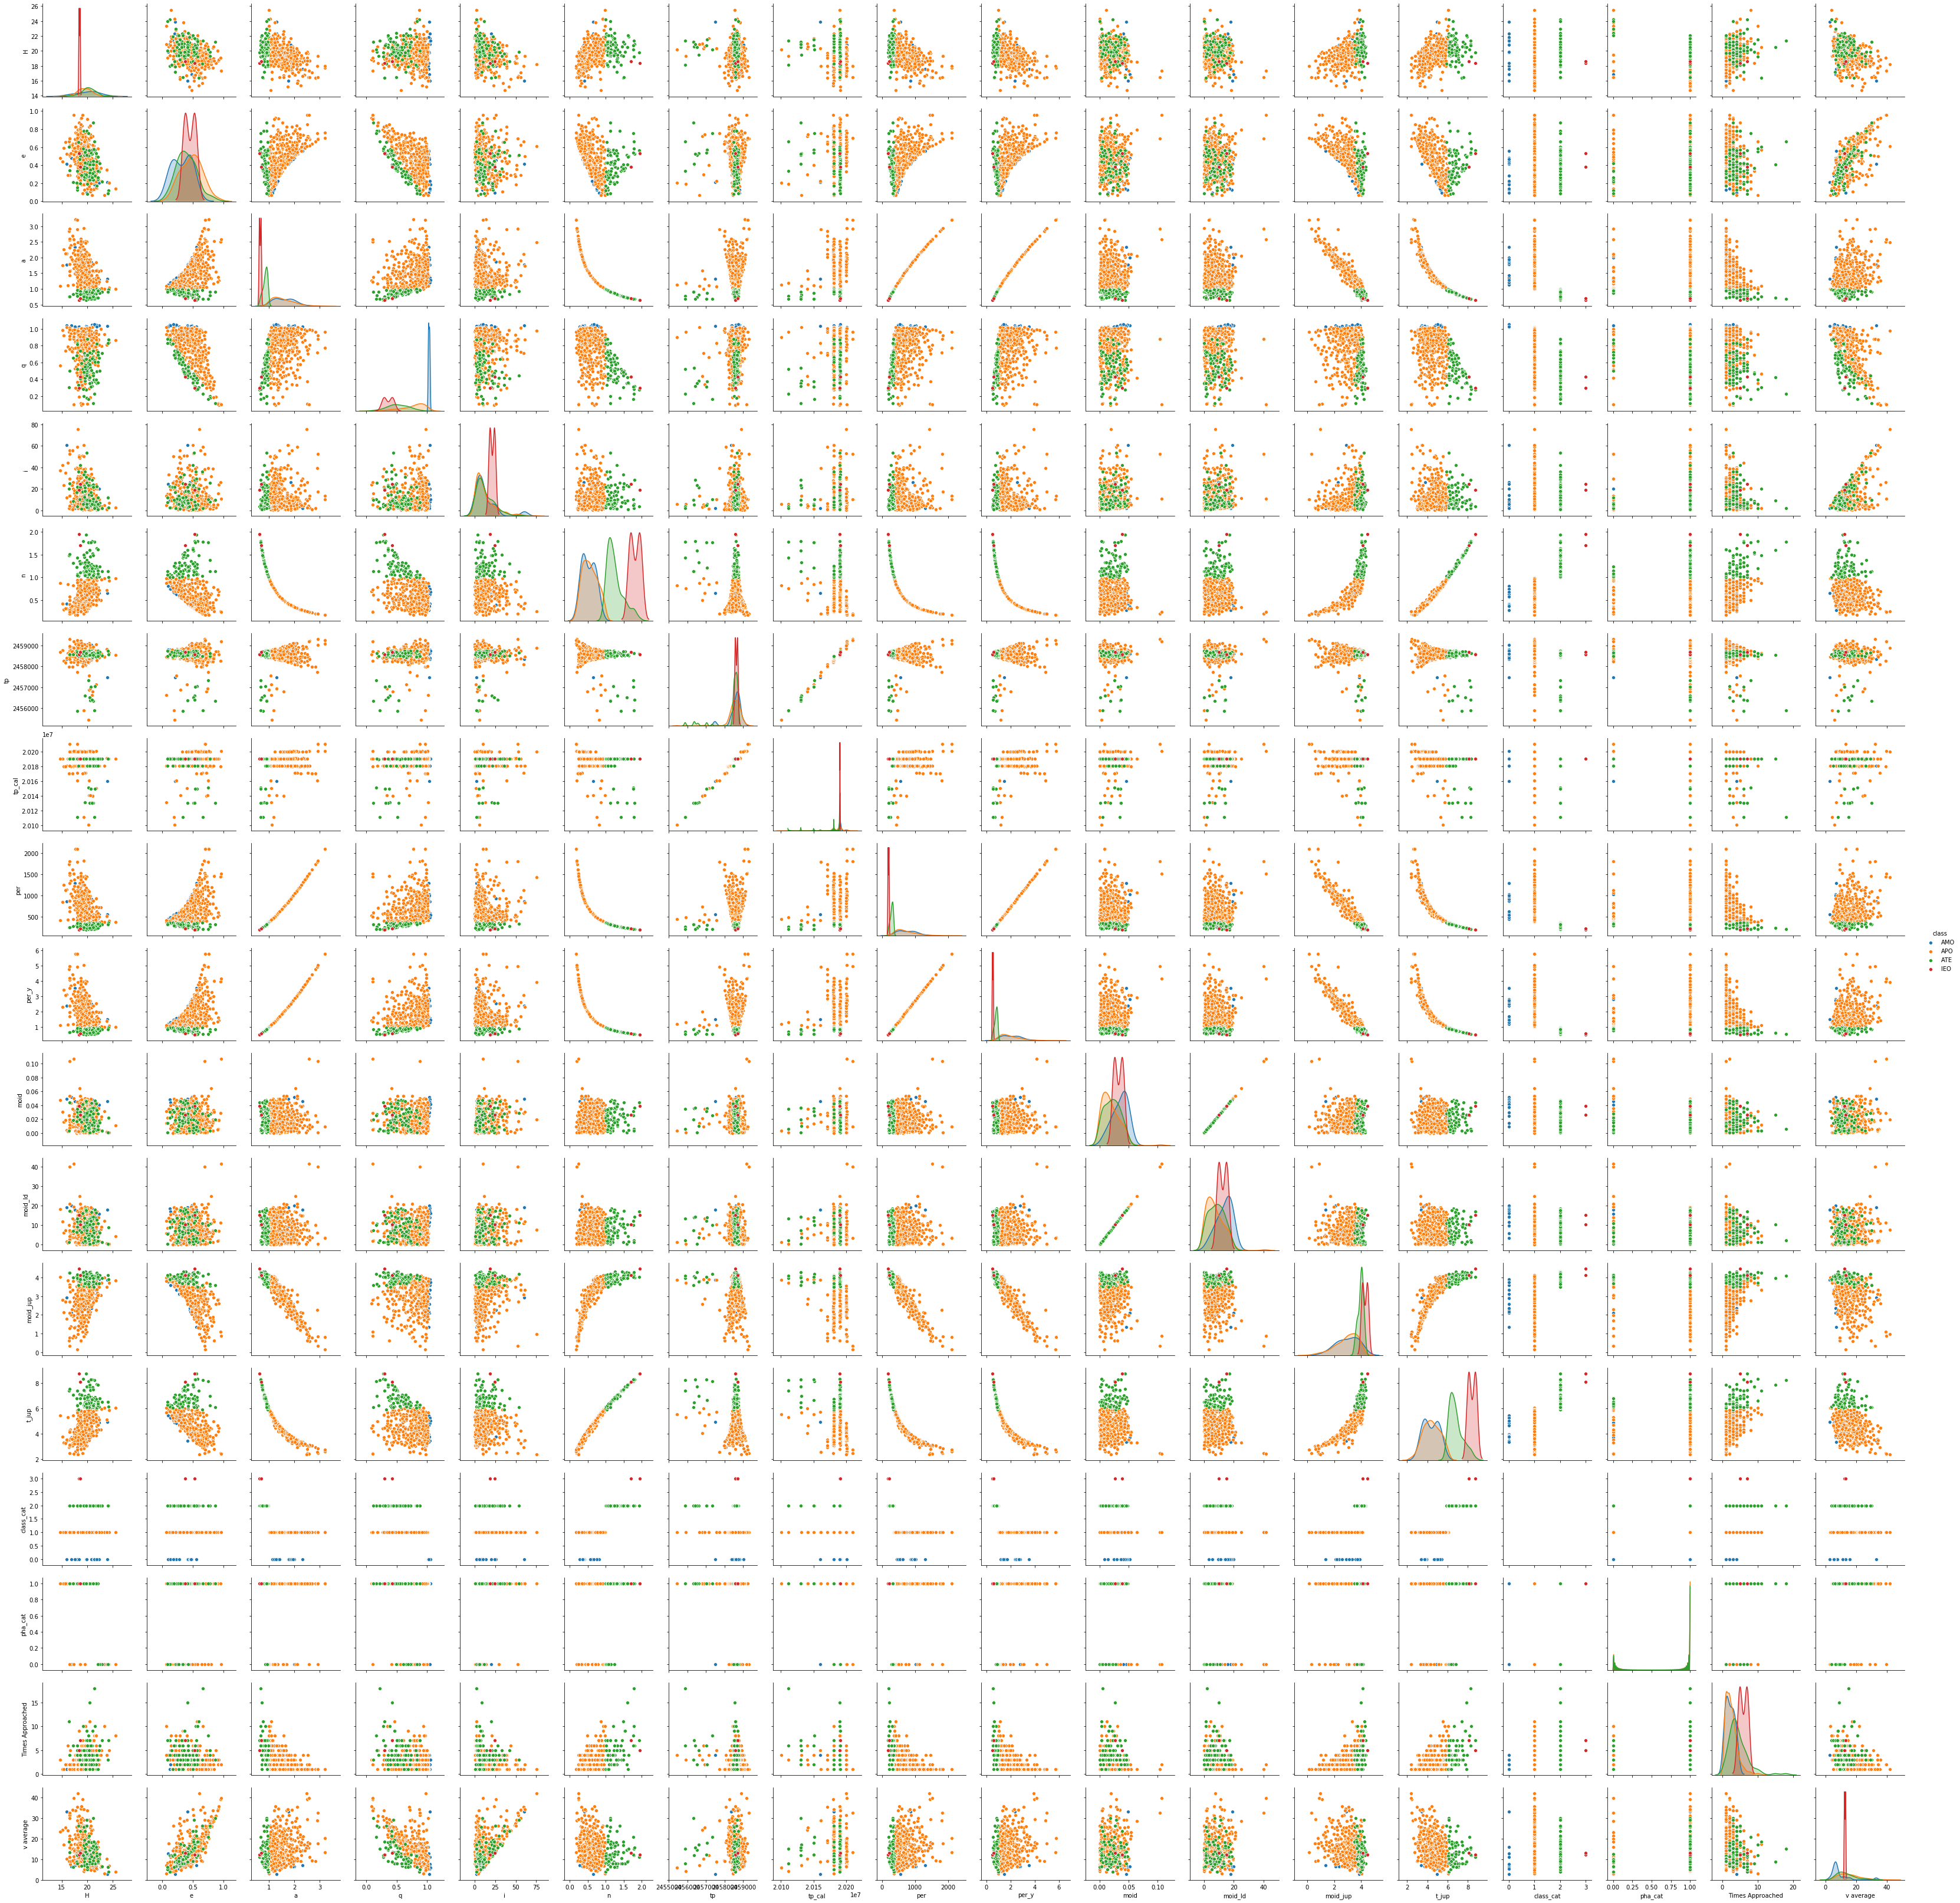

In [38]:
# scatterplot matrix
sns.pairplot(neo_analysis_1, hue='class')

In [39]:
# correlation plot
neo_analysis_1.corr()

,H,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,class_cat,pha_cat,Times Approached,v average
H,1.000000,-0.361553,-0.445417,-0.028215,-0.326287,0.348449,-0.085861,-0.076574,-0.448145,-0.448145,-0.127677,-0.127677,0.417419,0.402090,0.133547,-0.301604,0.246337,-0.378116
e,-0.361553,1.000000,0.518357,-0.569270,-0.079047,-0.373456,-0.035140,-0.033711,0.524917,0.524917,-0.023152,-0.023152,-0.641935,-0.468632,-0.076648,0.101133,-0.195048,0.679123
a,-0.445417,0.518357,1.000000,0.351899,-0.032906,-0.888528,0.174655,0.154682,0.995053,0.995053,-0.003069,-0.003069,-0.942394,-0.924428,-0.531562,0.015731,-0.477774,0.214569
q,-0.028215,-0.569270,0.351899,1.000000,0.049114,-0.472296,0.204493,0.182406,0.321050,0.321050,-0.013379,-0.013379,-0.161517,-0.389608,-0.497312,-0.037046,-0.255915,-0.559322
i,-0.326287,-0.079047,-0.032906,0.049114,1.000000,0.038114,0.039026,0.038083,-0.026773,-0.026773,0.151177,0.151177,0.164549,-0.018425,0.009510,0.084218,-0.135301,0.547574
n,0.348449,-0.373456,-0.888528,-0.472296,0.038114,1.000000,-0.241769,-0.214751,-0.842692,-0.842692,0.036726,0.036726,0.803346,0.989667,0.740850,-0.019030,0.546245,-0.184621
tp,-0.085861,-0.035140,0.174655,0.204493,0.039026,-0.241769,1.000000,0.980840,0.160412,0.160412,0.026257,0.026257,-0.147622,-0.221401,-0.155247,-0.050133,-0.207699,-0.021826
tp_cal,-0.076574,-0.033711,0.154682,0.182406,0.038083,-0.214751,0.980840,1.000000,0.141878,0.141878,0.038406,0.038406,-0.136269,-0.196434,-0.127920,-0.047165,-0.175935,-0.019760
per,-0.448145,0.524917,0.995053,0.321050,-0.026773,-0.842692,0.160412,0.141878,1.000000,1.000000,0.003622,0.003622,-0.941904,-0.885858,-0.477780,0.010954,-0.454194,0.215727
per_y,-0.448145,0.524917,0.995053,0.321050,-0.026773,-0.842692,0.160412,0.141878,1.000000,1.000000,0.003622,0.003622,-0.941904,-0.885858,-0.477780,0.010954,-0.454194,0.215727


## Data Analysis

### Recursive Feature Elimination (RFE) & Linear Regression

(0, 1.0052323296926415)

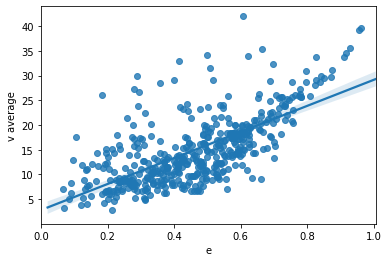

In [40]:
# scatter plot
sns.regplot(x = neo_analysis_1['e'], y = neo_analysis_1['v average'])
plt.xlim(0, None)

In [41]:
# creating X & y
X = neo_analysis_1.iloc[:,0:14]
y = neo_analysis_1['v average']

feature_cols = np.array(X.columns)

# train test split (70% of the data is used for training)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape)

(325, 14) (140, 14)


In [42]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# RFE using 10 features
estimator = LinearRegression()
selector = RFE(estimator, 10)
selector.fit(X_train, y_train)
sup = selector.get_support()
print("Selected features:", feature_cols[sup])
# test the model
predicted = selector.predict(X_test)
print('MSE:', mean_squared_error(y_test, predicted)) # MSE (mean squared error)
print('R Squared:', r2_score(y_test, predicted)) # R Squared (coefficient of determination)

Selected features: ['H' 'e' 'a' 'q' 'i' 'n' 'per' 'moid_ld' 'moid_jup' 't_jup']
MSE: 1.6507649057337173
R Squared: 0.9644286569831955


In [43]:
# linear regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("y = ", reg.coef_, "* X + ", reg.intercept_)

predicted = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, predicted))
print('R Squared:', r2_score(y_test, predicted))

y =  [-5.61613655e-02 -1.79499801e-01 -5.92306525e+01 -1.65984671e+01
  2.14588687e-01  4.49595034e+01 -1.94722563e-04  6.58739047e-07
  5.65626906e-02  1.54860208e-04 -6.94187382e-05 -2.70156904e-02
 -1.09597149e+00 -2.21967221e+01] * X +  619.3371588681617
MSE: 1.6632185003682796
R Squared: 0.9641603019406333


The R Squared value is significantly high which establishes that linear regression is a suitable model.

(0, 56.01009893121157)

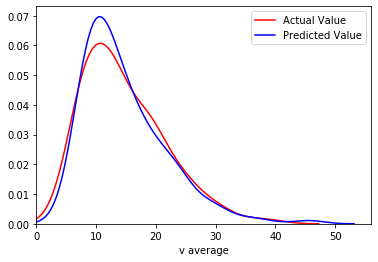

In [44]:
sns.distplot(y_test, hist=False, color='red', label='Actual Value')
sns.distplot(predicted, hist=False, color='blue', label='Predicted Value')
plt.xlim(0, None)

## Logistic Regression

We will be doing PHA logistic regressions with two datasets: neoClean2 (our first dataset) and neo_joined (our final dataset). Dataset neoClean2 will allow us to have as much datapoints as possible for a more accurate model, while neo_joined will allow us to make use of two new features we have obtained - average velocity (v average) and the number of times each object approaches Earth (Times Approached). 

### neoClean2

In [45]:
neoClean2['pha'].value_counts()

N    18704
Y     2002
Name: pha, dtype: int64

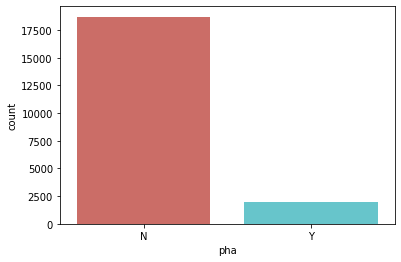

In [46]:
# bar chart
sns.countplot(x='pha', data=neoClean2, palette='hls')
plt.show()

In [47]:
neoClean2.groupby('pha').mean()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,class_cat,pha_cat
pha,,,,,,,,,,,,,,,,,,,,,,,,,,
N,22.974548,2.457960e+06,57959.903176,2.017243e+07,0.436428,1.794555,0.931920,12.536924,0.514682,2.457952e+06,2.017096e+07,1049.380256,2.873047,0.103545,40.296705,2.686072,4.237966,0.198374,0.174286,0.406741,0.789115,0.053458,84.051906,204.678421,0.665312,0.0
Y,20.047651,2.458334e+06,58333.811189,2.018303e+07,0.531353,1.789041,0.760638,13.825404,0.531085,2.458329e+06,2.018118e+07,961.379270,2.632113,0.023597,9.183419,2.577959,4.216923,0.012377,0.751496,0.010399,0.308315,0.010174,3.411126,2780.531545,1.030969,1.0


#### Using eccentricity as a predictor

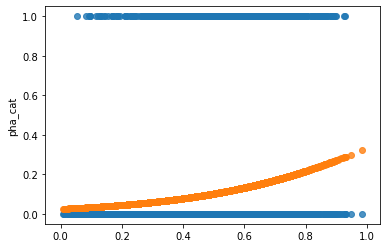

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# creating X & y
X = neoClean2[['e']]
y = neoClean2['pha_cat']

logreg = LogisticRegression(C=1e9)

# train test split (70% of the data is used for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)
probs = logreg.predict_proba(X_test)[:,1]
sns.regplot(x=X_test, y=y_test, data=neoClean2, logistic=True, fit_reg=False)
sns.regplot(x=X_test, y=probs, data=neoClean2, logistic=True)

In [49]:
print("Maximum probability:", probs.max())
print("Maximum eccentricity:", X.max())

Maximum probability: 0.3220628044454788
Maximum eccentricity: e    0.996731
dtype: float64


We can see that eccentricity can be used as a weak predictor, the more round the orbit, the less likely for an object to be PHA. Our model gives maximum probability of being PHA at 32.2% for the object with eccentricity of 0.996731. Objects with eccentricity larger than 1 have hyperbolic orbits and will eventually leave the Solar System. So, while we can't use eccentricity alone to determine if an object is PHA, higher values increase the chance of it being PHA and could be used to flag them as potential candidates.

In [50]:
print('Accuracy of logisitc regression on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logisitc regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logisitc regression on training set: 0.90
Accuracy of logisitc regression on test set: 0.91


#### Using orbit class as a predictor

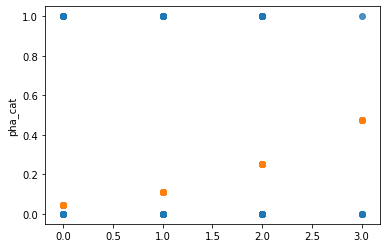

In [51]:
# creating X & y
X = neoClean2[['class_cat']]
y = neoClean2['pha_cat']

logreg = LogisticRegression(C=1e9)

# train test split (70% of the data is used for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)
probs = logreg.predict_proba(X_test)[:,1]
sns.regplot(x=X_test, y=y_test, data=neoClean2, logistic=True, fit_reg=False)
sns.regplot(x=X_test, y=probs, data=neoClean2, logistic=True)

In [52]:
print("Maximum probability:", probs.max())

Maximum probability: 0.47352222236626934


Using class as a predictor gives us interesting results. From the graph, we can tell that IEO objects are most likely to be PHA with a probability of 47.35%. AMO seems to be the safest class of orbits. 

In [53]:
print('Accuracy of logisitc regression on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logisitc regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logisitc regression on training set: 0.90
Accuracy of logisitc regression on test set: 0.91


### neo_joined

In [54]:
neo_joined['pha'].value_counts()

Y    435
N     30
Name: pha, dtype: int64

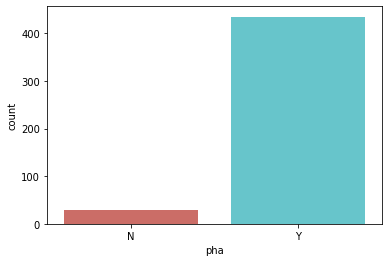

In [55]:
# bar chart
sns.countplot(x='pha', data=neo_joined, palette='hls')
plt.show()

In [56]:
neo_joined.groupby('pha').mean()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,class_cat,pha_cat,Times Approached,v average
pha,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,21.373333,2.458555e+06,58554.433333,2.018910e+07,0.392259,1.407269,0.760762,9.149013,0.722298,2.458614e+06,2.018904e+07,639.772037,1.751600,0.030637,11.922993,3.172192,4.989600,2.407952e-07,2.697562e-08,2.455622e-07,0.000011,3.137554e-08,0.000090,0.000017,1.166667,0.0,3.500000,12.499911
Y,19.512161,2.458518e+06,58517.567816,2.018813e+07,0.466060,1.437699,0.727099,13.342771,0.695630,2.458521e+06,2.018657e+07,654.486939,1.791888,0.020187,7.856274,3.111908,4.861221,1.214375e-07,1.483736e-08,1.576682e-07,0.000014,9.944920e-09,0.000064,0.000010,1.151724,1.0,2.924138,15.130320


The average velocity of a PHO is approximately 15.13km/s compared to 12.5km/s for a non-PHO.

#### Using Times Approached as a predictor

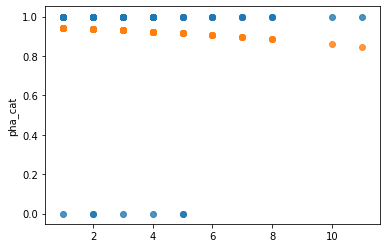

In [57]:
# creating X & y
X = neo_joined[['Times Approached']]
y = neo_joined['pha_cat']

logreg = LogisticRegression(C=1e9)

# train test split (70% of the data is used for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)
probs = logreg.predict_proba(X_test)[:,1]
sns.regplot(x=X_test, y=y_test, data=neoClean2, logistic=True, fit_reg=False)
sns.regplot(x=X_test, y=probs, data=neoClean2, logistic=True)

Times Approached seems to be a weak predictor for PHA, but we can still see that higher number of approaches slightly lowers the probability of an object being PHA.

In [58]:
print('Accuracy of logisitc regression on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logisitc regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logisitc regression on training set: 0.93
Accuracy of logisitc regression on test set: 0.95


#### Using average velocity at approach as a predictor

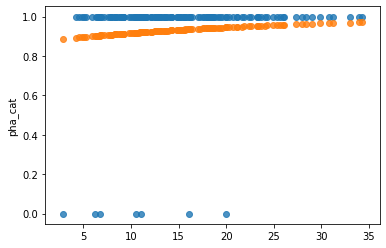

In [59]:
# creating X & y
X = neo_joined[['v average']]
y = neo_joined['pha_cat']

logreg = LogisticRegression(C=1e9)

# train test split (70% of the data is used for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)
probs = logreg.predict_proba(X_test)[:,1]
sns.regplot(x=X_test, y=y_test, data=neoClean2, logistic=True, fit_reg=False)
sns.regplot(x=X_test, y=probs, data=neoClean2, logistic=True)

Again, as with Times Approached, average velocity seems to be a weak predictor, but we can still see that an increase in average speed slightly increases the probability of an object being PHA. 

In [60]:
print('Accuracy of logisitc regression on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logisitc regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logisitc regression on training set: 0.93
Accuracy of logisitc regression on test set: 0.95


#### Scatter plots

(0, 44.390358881501946)

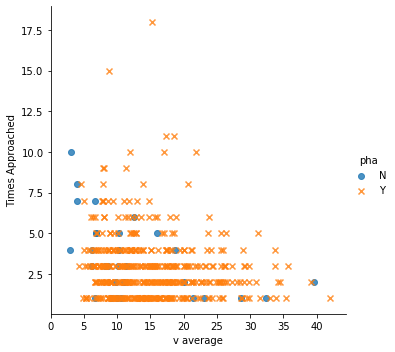

In [61]:
sns.lmplot(x="v average", y="Times Approached", hue="pha", data=neo_joined, markers=["o", "x"], fit_reg=False)
plt.xlim(0, None)

From the scatter plot we can see that the higher the object's average velocity at approach is, the lower the number of approaches. There is also a few outliers.

(0, 1.01552233999802)

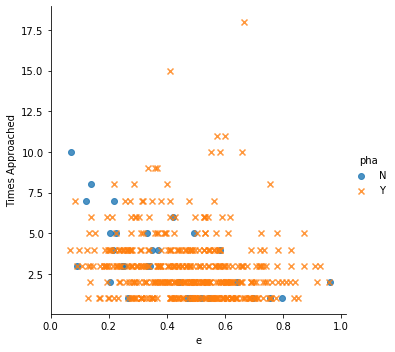

In [62]:
sns.lmplot(x="e", y="Times Approached", hue="pha", data=neo_joined, markers=["o", "x"], fit_reg=False)
plt.xlim(0, None)

(0, 3.368926184435368)

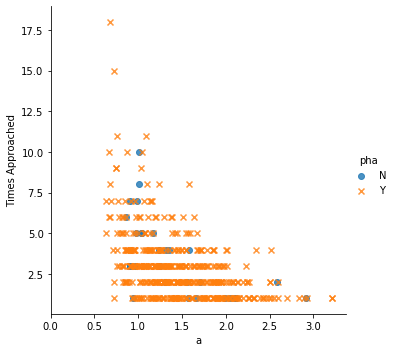

In [63]:
sns.lmplot(x="a", y="Times Approached", hue="pha", data=neo_joined, markers=["o", "x"], fit_reg=False)
plt.xlim(0, None)

## Determining the best supervised learning algorithms to predict orbit class

Now we will try to predict orbit class using two datasets again. Dataset neoClean2 (our first dataset) and neo_analysis_1 (our joined dataset with relevant columns). Dataset neoClean2 will allow us to have as much datapoints as possible for a more accurate model, while neo_analysis_1 will allow us to make use of two new features we have obtained - average velocity (v average) and the number of times each object approaches Earth (Times Approached). 

### neoClean2

In [64]:
# using absolute magnitude as a feature

# creating X & y
X = neoClean2[['H']]
y = neoClean2['class_cat']

# train test split (70% of the data is used for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now we are going to use three different prediction algorithms: KNearestNeighbors (KNN), Gaussian Naive Bayes and Neural Networks (Multilayer Perceptron) and decide which one is the best used for prediction.

#### KNearestNeighbors (KNN)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
accuracy_score(y_test, predicted_knn)

0.5119124275595621

(0, 3.1499999999999995)

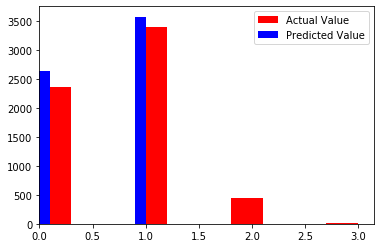

In [66]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_knn, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

#### Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
gau = GaussianNB()
gau.fit(X_train, y_train)
predicted_gau = gau.predict(X_test)
accuracy_score(y_test, predicted_gau)

0.542337411461687

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted_gau, y_test)

array([[ 637,  670,   50,    5],
       [1716, 2732,  401,    1],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0]], dtype=int64)

(0, 3.1499999999999995)

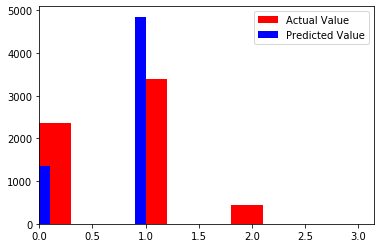

In [69]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_gau, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

#### Neural Networks (Multilayer Perceptron)

In [70]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
predicted_mlp = mlp.predict(X_test)
accuracy_score(y_test,predicted_mlp)

0.5428203477141017

(0, 3.1499999999999995)

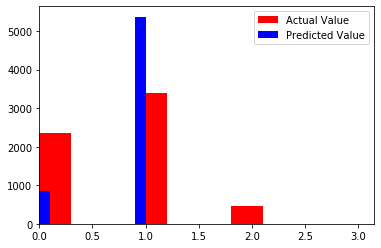

In [71]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_mlp, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

Evidently, KNN is the most accurate predictor for classes AMO and APO, but our model struggles with predicting ATE and IEO. 

### neo_analysis_1

In [72]:
neo_analysis_1['class'].value_counts()

APO    364
ATE     83
AMO     16
IEO      2
Name: class, dtype: int64

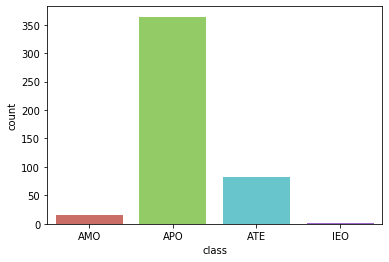

In [73]:
# bar chart
sns.countplot(x='class', data=neo_analysis_1, palette='hls')
plt.show()

In [74]:
neo_joined.groupby('class').mean()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,class_cat,pha_cat,Times Approached,v average
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AMO,20.037500,2.458515e+06,58514.562500,2.018795e+07,0.323875,1.603847,1.032892,13.277382,0.530338,2.458593e+06,2.018768e+07,755.218338,2.067675,0.035378,13.768026,2.987902,4.370062,2.165650e-07,2.127912e-08,2.937772e-07,0.000012,1.483796e-08,0.000122,0.000014,0.0,0.812500,2.250000,9.229896
APO,19.472775,2.458559e+06,58558.568681,2.018928e+07,0.481330,1.563473,0.765067,13.033584,0.570047,2.458563e+06,2.018762e+07,733.692106,2.008740,0.019877,7.735633,2.920609,4.428802,1.032913e-07,1.637239e-08,1.494236e-07,0.000013,8.395161e-09,0.000065,0.000012,1.0,0.947802,2.607143,15.645329
ATE,20.280723,2.458350e+06,58349.674699,2.018346e+07,0.400080,0.861703,0.522546,12.995895,1.260694,2.458354e+06,2.018254e+07,293.385331,0.803245,0.022094,8.598426,3.968199,6.812771,2.259814e-07,1.142950e-08,2.013813e-07,0.000016,2.302875e-08,0.000057,0.000006,2.0,0.903614,4.578313,13.116565
IEO,18.500000,2.458600e+06,58600.000000,2.019043e+07,0.455496,0.665140,0.364434,21.626814,1.823819,2.458636e+06,2.019057e+07,198.288523,0.542884,0.032686,12.720274,4.288525,8.427000,1.148090e-07,7.427850e-09,7.364050e-08,0.000030,3.133700e-08,0.000073,0.000003,3.0,1.000000,6.000000,12.716857


The class that has the greatest average velocity is APO (Apollos) and the class that has the smallest average velocity is AMO (Amors).

Now we are going to use three different prediction algorithms: KNearestNeighbors (KNN), Gaussian Naive Bayes and Neural Networks (Multilayer Perceptron) and decide which one is the best used for prediction.

##### Using average velocity at approach as a predictor

In [75]:
# creating X & y
X = neo_analysis_1[['v average']]
y = neo_analysis_1['class_cat']

# train test split (70% of the data is used for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### KNearestNeighbors (KNN)

In [76]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
accuracy_score(y_test, predicted_knn)

0.7928571428571428

In [77]:
confusion_matrix(predicted_knn, y_test)

array([[  0,   0,   1,   0],
       [  7, 110,  15,   1],
       [  0,   5,   1,   0],
       [  0,   0,   0,   0]], dtype=int64)

(0, 3.1499999999999995)

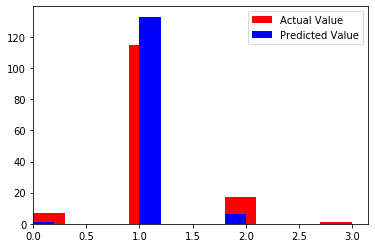

In [78]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_knn, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

#### Gaussian Naive Bayes

In [79]:
gau = GaussianNB()
gau.fit(X_train, y_train)
predicted_gau = gau.predict(X_test)
accuracy_score(y_test, predicted_gau)

0.8214285714285714

(0, 3.1499999999999995)

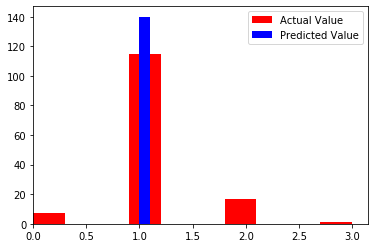

In [80]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_gau, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

#### Neural Networks (Multilayer Perceptron) 

In [81]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
predicted_mlp = mlp.predict(X_test)
accuracy_score(y_test,predicted_mlp)

0.8214285714285714

In [82]:
print('Accuracy of MLPCLassifier on training set: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy of MLPCLassifier on test set:', accuracy_score(y_test,predicted_mlp))

Accuracy of MLPCLassifier on training set: 0.77
Accuracy of MLPCLassifier on test set: 0.8214285714285714


In [83]:
confusion_matrix(predicted_mlp, y_test)

array([[  0,   0,   0,   0],
       [  7, 115,  17,   1],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=int64)

(0, 3.1499999999999995)

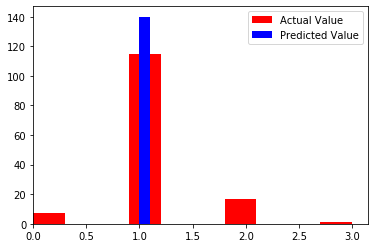

In [84]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_mlp, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

Evidently, KNN is the most accurate predictor as it managed to predict values for AMO, ATO and ATE objects. MLP and Gaussian Naive Bayes were only able to predict ATO.

##### Using Times Approached as a predictor

In [85]:
# creating X & y
X = neo_analysis_1[['Times Approached']]
y = neo_analysis_1['class_cat']

# train test split (70% of the data is used for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### KNearestNeighbors (KNN)

In [86]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
accuracy_score(y_test, predicted_knn)

0.8142857142857143

(0, 3.1499999999999995)

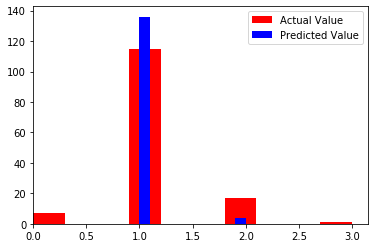

In [87]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_knn, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

#### Gaussian Naive Bayes

In [88]:
gau = GaussianNB()
gau.fit(X_train, y_train)
predicted_gau = gau.predict(X_test)
accuracy_score(y_test, predicted_gau)

0.7571428571428571

In [89]:
print('Accuracy of Gaussian Naive Bayes on training set: {:.2f}'.format(gau.score(X_train, y_train)))
print('Accuracy of Gaussian Naive Bayes on test set:', accuracy_score(y_test,predicted_gau))

Accuracy of Gaussian Naive Bayes on training set: 0.75
Accuracy of Gaussian Naive Bayes on test set: 0.7571428571428571


In [90]:
confusion_matrix(predicted_gau, y_test)

array([[  0,   0,   0,   0],
       [  7, 101,  10,   0],
       [  0,   8,   5,   1],
       [  0,   6,   2,   0]], dtype=int64)

(0, 3.15)

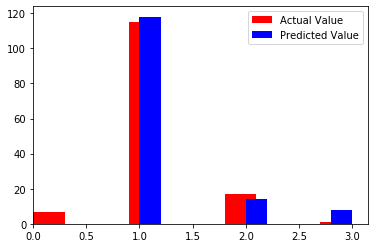

In [91]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_gau, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

#### Neural Networks (Multilayer Perceptron) 

In [92]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
predicted_mlp = mlp.predict(X_test)
accuracy_score(y_test,predicted_mlp)

0.8214285714285714

In [93]:
print('Accuracy of MLPCLassifier on training set: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy of MLPCLassifier on test set:', accuracy_score(y_test,predicted_mlp))

Accuracy of MLPCLassifier on training set: 0.78
Accuracy of MLPCLassifier on test set: 0.8214285714285714


In [94]:
confusion_matrix(predicted_mlp, y_test)

array([[  0,   0,   0,   0],
       [  7, 111,  13,   0],
       [  0,   4,   4,   1],
       [  0,   0,   0,   0]], dtype=int64)

(0, 3.1499999999999995)

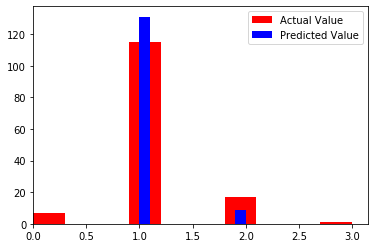

In [95]:
plt.hist(y_test, color='red', label='Actual Value')
plt.hist(predicted_mlp, color='blue', label='Predicted Value')
plt.legend()
plt.xlim(0, None)

Surprisingly, Gaussian Naive Bayes has achieved the best results, being able to predict ATO, ATE and even IEO asteroids (even though it overestimated their occurence).

## Conclusion

In conclusion, in our NEO (near-Earth objects) analysis, we investigated if we can predict if NEO are PHOs (Potentially Hazardous Objects) from their orbital and physical characteristics and determined how often PHOs have close approaches with Earth. We obtained two datasets from the Jet Propulsion Laboratory at the California Institute of Technology (NASA) in CSV format which we explored, cleansed and joined together to create a final dataset. Once we created our final dataset, we visually explored the data by generating histograms and a scatter plot matrix.

After this, we then began analysing our data. This involved performing linear regression (which included RFE using 10 features) and PHA logistic regressions. It also included using three different supervised learning algorithms: KNearestNeighbors (KNN), Gaussian Naive Bayes and Neural Networks (Multilayer Perceptron) to determine which algorithm was the best at predicting orbit class. Thus, we were successful in finding some interesting results which included learning that Times Approached is a weak predictor for PHA and KNN is the most accurate predictor for classes AMO and APO when using absolute magnitude as a feature.